In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize 

In [62]:
class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    self._dt = dt
    self._n_iters = int(tmax / dt)
    # Intial state
    self.pred_init = pred_init
    self.prey_init = prey_init
    # Data arrays
    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    """
    Simulation settings:
        alpha - prey growth
        beta  - prey mortality
        delta - predator growrh
        gamma - predator mortality
    """
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()

In [63]:
prey_cnt  = 1
pred_cnt  = 1

# Функция ошибки
def funky(values):
    alpha, beta, gamma, delta = values
 
    x_stac = gamma / delta
    y_stac = alpha / beta

    con = beta * pred_cnt + delta * prey_cnt - alpha * np.log(np.abs(pred_cnt)) - gamma * np.log(np.abs(prey_cnt))
    
    def x_func(prey_cnt):
        return alpha + delta * prey_cnt - alpha * np.log(np.abs(y_stac)) - gamma * np.log(np.abs(prey_cnt)) - con 
    
    def y_func(pred_cnt):
        return beta * pred_cnt + gamma - alpha * np.log(np.abs(pred_cnt)) - gamma * np.log(np.abs(x_stac)) - con
    
    return np.abs(fsolve(y_func, 0.0001) / fsolve(x_func, 0.0001) - 1.2)

In [64]:
solution = minimize(funky, [1, 1, 1, 1])
print("alpha = ", round(solution.x[0], 4))
print("beta =  ", round(solution.x[1], 4))
print("gamma = ", round(solution.x[2], 4))
print("delta = ", round(solution.x[3], 4))


C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


alpha =  0.9425
beta =   1.0335
gamma =  0.8715
delta =  1.1327


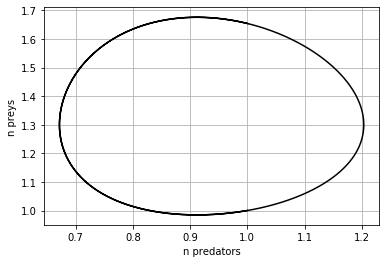

In [65]:
biome = Biome(pred_init=pred_cnt, prey_init=prey_cnt, tmax=10, dt=0.0001)
biome.run(solution.x[0], solution.x[1], solution.x[2], solution.x[3])
biome.plot()
biome.plot_cycle()